First read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import style
from scipy.interpolate import interp1d
style.use('ggplot')

In [2]:
data = pd.read_csv("X_forward.csv")

Create sub-fields

In [3]:
S_0 = data["S0"]
t1 = data["t1"]
t2 = data["t2"]
strikes_t1 = data.iloc[:,3:23]
bid_t1 = data.iloc[:,23:43]
ask_t1 = data.iloc[:,43:63]
bid_t1.columns = range(bid_t1.shape[1])
ask_t1.columns = range(ask_t1.shape[1])
mid_t1 = 0.5*(ask_t1+bid_t1)
strikes_t2 = data.iloc[:,123:143]
bid_t2 = data.iloc[:,143:163]
ask_t2 = data.iloc[:,163:183]
bid_t2.columns = range(bid_t2.shape[1])
ask_t2.columns = range(ask_t2.shape[1])
mid_t2 = 0.5*(ask_t2+bid_t2)

Only Consider Prices between $60 \%$ and $115 \%$. Consider the same grid for all options. Thus we use linear interpolation between the strikes.

In [4]:
nr_iter = 20
list_prices = []
x = np.linspace(0.7,1.15,nr_iter)
for i in range(len(data)):
    if (min(strikes_t1.iloc[i,:])<0.7)&(max(strikes_t1.iloc[i,:])>1.15):
        list_prices.append(interp1d(strikes_t1.iloc[i,:],ask_t1.iloc[i,:])(x))
        list_prices.append(interp1d(strikes_t1.iloc[i,:],bid_t1.iloc[i,:])(x))
    if (min(strikes_t2.iloc[i,:])<0.7)&(max(strikes_t2.iloc[i,:])>1.15):
        list_prices.append(interp1d(strikes_t2.iloc[i,:],ask_t2.iloc[i,:])(x))
        list_prices.append(interp1d(strikes_t2.iloc[i,:],bid_t2.iloc[i,:])(x))
list_prices = np.array(list_prices)

In [5]:
list_prices=np.where(np.isfinite(list_prices), list_prices, 0)
average_prices = np.mean(list_prices,axis = 0)
quantile_low = np.quantile(list_prices,0.05, axis = 0)
quantile_hi = np.quantile(list_prices,0.95, axis = 0)

Check the Length of all considered prices

In [6]:
len(list_prices)

21002

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


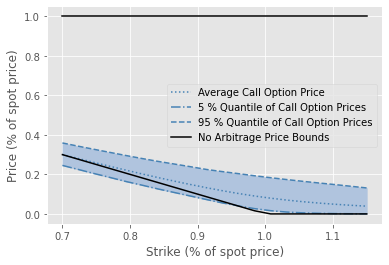

In [8]:
plt.plot(x,average_prices,color = "steelblue", linestyle = "dotted", label = "Average Call Option Price")
plt.plot(x,quantile_low,color = "steelblue",linestyle = "dashdot",label = "5 % Quantile of Call Option Prices")
plt.plot(x,quantile_hi,color = "steelblue",linestyle = "dashed",label = "95 % Quantile of Call Option Prices")
plt.plot(x,[max(1-val,0) for val in x],color = "black",linestyle = "solid",label = "No Arbitrage Price Bounds")
plt.plot(x,[1]*nr_iter,color = "black",linestyle = "solid")
plt.fill_between(x, quantile_low, quantile_hi, color = 'lightsteelblue')
plt.xlabel("Strike (% of spot price)")
plt.ylabel("Price (% of spot price)")
plt.legend()
plt.savefig("call_empirical_bounds.eps")

strikes_t1

In [5]:
deviation_lower_bound = []
deviation_upper_bound = []
for i in range(len(data)):
    for j in range(20):
            if t1[i] < 60:
                deviation_lower_bound.append((ask_t1.iloc[i,j]-max((1-strikes_t1.iloc[i,j]),0))*100)
                deviation_upper_bound.append((1-ask_t1.iloc[i,j])*100)
            if t2[i] < 60:
                deviation_lower_bound.append((ask_t2.iloc[i,j]-max((1-strikes_t2.iloc[i,j]),0))*100)
                deviation_upper_bound.append((1-ask_t2.iloc[i,j])*100)

Create the plots

C:\Users\Julian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Julian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Julian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Julian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


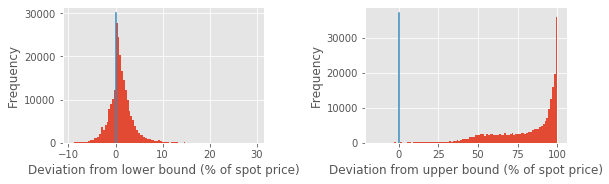

In [8]:
# Create Subplots
fig, axs = plt.subplots(1,2,figsize = (10,3))
plt.gcf().subplots_adjust(left=0.2,wspace = 0.5,bottom = 0.25)

axs[0].hist(deviation_lower_bound,bins = 100)
axs[0].plot([0,0],[0,30000])
axs[0].set(xlabel="Deviation from lower bound (% of spot price)", ylabel = "Frequency")

axs[1].hist(deviation_upper_bound,bins = 100)
axs[1].plot([0,0],[0,37000])
axs[1].set(xlabel="Deviation from upper bound (% of spot price)", ylabel = "Frequency")

plt.savefig("histogram.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


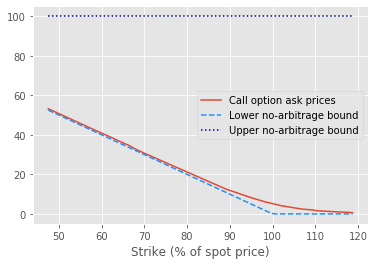

In [10]:
prices_x = [p*100 for p in ask_t1.iloc[9001,:]]
strikes_x = [s*100 for s in strikes_t1.iloc[9001,:]]
lower_bound_x = [max(100-strikes_x[i],0) for i in range(len(prices_x))]
upper_bound_x = [100]*len(prices_x)
plt.plot(strikes_x,prices_x,label = "Call option ask prices")
plt.plot(strikes_x,lower_bound_x,color = "dodgerblue",linestyle='dashed',label = "Lower no-arbitrage bound")
plt.plot(strikes_x,upper_bound_x,color = "darkblue",linestyle='dotted',label = "Upper no-arbitrage bound")
plt.xlabel("Strike (% of spot price)")
plt.legend()
plt.savefig("call_lower_upper.eps")
